# **패스트푸드 매장 분포 분석**

***
**뉴스기사**
- ["매장수 1331 대 436, 롯데리아와 맥도날드의 '반전 매출'"](http://www.bizhankook.com/bk/article/14713)
- ["맥도날드, 20년 된 신촌점 철수… 핵심상권 떠난다"](https://www.hankyung.com/economy/article/2018031330041)
- ["맥도날드가 사라지는 이유"](https://www.sedaily.com/NewsVIew/1RZE00DFX6)
- [롯데리아·맥도날드 "아 옛날이여"…맘스터치·버거킹 "파죽지세"](https://www.asiae.co.kr/article/2019052210574919230)
- ["버거킹, 月 4개 이상 오픈… 상반기 맥도날드 매장수 넘을 듯"](http://biz.newdaily.co.kr/site/data/html/2020/02/19/2020021900063.html)

***
**같이 확인해볼 질문**
1. 맥도날드 매장 수는 계속 줄어들고 있을까?
2. 버거킹은 맥도날드를 매장수에서 이겼을까?
3. 패스트푸드 매장은 어느 지역에 많이 분포할까?

*** 
**사용데이터**  
[상가정보 데이터셋 - 2015년 12월 ~ 2019년 12월](https://www.data.go.kr/dataset/15012005/fileData.do)
- 상가(상권)정보_201912
- 소상공인시장진흥공단_상가업소정보_201812
- 상가업소정보(2017년 12월)
- 상가업소정보 (2016년 12월)
- 상가업소정보 (2015년 12월) 

***
**Google Colab 사용 설정**  
- [Google Colab 사용하기](https://zzsza.github.io/data/2018/08/30/google-colab/)
- [Google Colab 사용법](https://datascienceschool.net/view-notebook/f9d9fddb7cc7494a9e4be99f0e137be0/)


In [0]:
# 구글 드라이브와 Colab 연동
# 마운트가 해제되었다면, 다시 실행해주세요
# 자세한 내용은 위에 정리해둔 페이지를 참고해주세요

from google.colab import auth
auth.authenticate_user()

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
# 내 구글드라이브와 연동되었다면 데이터를 저장해놓은 경로를 지정해줍니다.

dir = './gdrive/My Drive/00.Colab Notebooks/fastcampus/패스트푸드 매장 분포 분석/data/'

***
## **파이썬 라이브러리 로드**

In [0]:
# 경고메세지 제거
import warnings
warnings.filterwarnings('ignore')

In [0]:
# library import
import numpy as np
import pandas as pd
import glob

In [0]:
# 시각화 library import
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from plotnine import * #ggplot
import folium #지도시각화

**(참고) 한글폰트 사용하기**
- [matplotlib 한글폰트 사용하기](http://corazzon.github.io/matplotlib_font_setting)
- [google colab 한글폰트 사용하기](https://colab.research.google.com/github/nicewook/datascience_exercise/blob/master/korean_font_on_matplotlib.ipynb)

In [0]:
import matplotlib.font_manager as fm

# 나눔 폰트가 있는지 확인해봅니다.
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

In [0]:
# 나눔 폰트의 수를 출력해봅니다.

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

In [0]:
# # 만약 나눔 폰트가 없다면, 나눔 폰트를 설치해줍니다.

!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [0]:
# 설치된 나눔 폰트 출력
# 만약, 설치했는데도, 리스트가 [] 로 출력된다면 런타임을 다시 시작해주세요

nanum_font

In [0]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 확인해봅니다.

!python --version
def current_font():
  print(f"현재 설정된 폰트 글꼴: {plt.rcParams['font.family']}, 현재 설정된 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능
        
current_font()

In [0]:
# 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져옵니다.

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  
font_name = fm.FontProperties(fname=path, size=14).get_name()
print(font_name)
plt.rc('font', family=font_name)

In [0]:
# fm._rebuild() 를 해주어야 적용됩니다.

fm._rebuild()

In [0]:
# 노트북 전체 폰트 및 차트 크기 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (12,6)

print('설정 되어있는 폰트 사이즈 : {}'.format(plt.rcParams['font.size']))
print('설정 되어있는 폰트 글꼴 : {}'.format(plt.rcParams['font.family']))
print('설정 되어있는 차트 크기 : {}'.format(plt.rcParams["figure.figsize"]))

In [0]:
# matplotlib에서 마이너스 부호가 깨질 때

mpl.rcParams['axes.unicode_minus'] = False

***
## **데이터 로드**

***
#### **상가(상권)정보_201912**

In [0]:
# data load 방법1

df_store1 = pd.read_csv(dir + '상가(상권)정보_201912/상가업소정보_201912_01.csv', encoding='utf-8', delimiter='|')
df_store2 = pd.read_csv(dir + '상가(상권)정보_201912/상가업소정보_201912_02.csv', encoding='utf-8', delimiter='|')
df_store3 = pd.read_csv(dir + '상가(상권)정보_201912/상가업소정보_201912_03.csv', encoding='utf-8', delimiter='|')
df_store4 = pd.read_csv(dir + '상가(상권)정보_201912/상가업소정보_201912_04.csv', encoding='utf-8', delimiter='|')

***
**(참고)**  
- [파이썬 입력과 출력](https://docs.python.org/ko/3/tutorial/inputoutput.html)

In [0]:
# print문과 shape로 데이터셋 형태 확인



In [0]:
# 데이터셋 앞에서부터 3행 출력



In [0]:
# 데이터셋의 칼럼 확인



In [0]:
# 나머지 데이터셋도 확인해봅니다.

print(df_store2.columns)
print(df_store3.columns)
print(df_store4.columns)

***
#### **불러온 2019년 데이터셋을 하나의 데이터셋으로 만들어봅니다.**  
**(참고)**  
- [pandas의 concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)
- [pandas의 reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)

In [0]:
# df_store1과 df_store2를 가로로 합쳐보기



In [0]:
# df_store1과 df_store2를 가로로 합친 shape



In [0]:
# df_store1과 df_store2를 세로로 합친 shape



In [0]:
# 데이터셋 세로로 합치기 : df_store
df_store = 

# 인덱싱 재지정
df_store = 
df_store.head(3)

In [0]:
# shape 확인

df_store.shape

In [0]:
# 수가 맞는지 확인

573680 + 528311 + 869907 + 769298

In [0]:
# df_store 뒤에서부터 3행 출력

df_store.tail(3)

***
#### **다른 방법으로 데이터를 불러옵니다.**  
**(참고)**  
- [glob](https://docs.python.org/ko/3/library/glob.html)  
- [wikidocs](https://wikidocs.net/83)
- [for문](https://wikidocs.net/22)
- [if문](https://wikidocs.net/20)

In [0]:
# 원하는 폴더에 있는 파일들을 차례로 불러오는 방법
import glob

# 원하는 폴더에 있는 전체 파일 출력


In [0]:
# csv 파일만 불러와봅니다.

glob.glob(dir + '상가(상권)정보_201912/*.csv') 

In [0]:
# glob 내 경로들은 리스트로 묶여져있습니다.

print( type(glob.glob(dir + '상가(상권)정보_201912/*.csv')) ) 

In [0]:
# data load 방법2
# 해당 폴더에 있는 csv 파일들을 for문을 돌려 하나의 DF로 합쳐준다.

folder_li = glob.glob(dir + '상가(상권)정보_201912/*.csv')

# for문
for i in range(len(folder_li)):
    
    # df명
    df = 'df_store' + str(i+1)
    print(df)
    
    # 파일 로드
    df = pd.read_csv(folder_li[i], encoding='utf-8', delimiter='|')
    
    # df명을 넣는 조건
    if i == 0:
        df_store = df
    elif i > 0:
        df_store = pd.concat([df_store, df], axis=0)

# 인덱스 재지정
df_store = df_store.reset_index(drop=True)        
print(df_store.shape)

In [0]:
# 칼럼별 데이터타입 확인 방법1



In [0]:
# 칼럼별 데이터타입 확인 방법2



***
#### **데이터셋을 불러왔다면 null값이 있는지 확인해줍니다.**
- [pandas의 isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html)
- [pandas의 notnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notnull.html)

In [0]:
# 칼럼 별 결측치 확인



***
#### **결측치 시각화하기**  
소개할 방법은 seaborn과 missingno 라이브러리  
- [seaborn의 heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
- [missingno](https://github.com/ResidentMario/missingno)

In [0]:
# seaborn heatmap
# row가 많아 시간이 조금 걸릴 수 있습니다.
import seaborn as sns



In [0]:
#!pip install missingno
import missingno as msno



In [0]:
# missingno barplot



***
#### **결측치 처리하기**  
- 결측치를 처리하는 방법에는 크게 삭제 혹은 특정값으로 채우는 방법이 있습니다.
- 데이터가 많을 경우 데이터를 삭제할 수도 있겠지만, 그렇지 않다면 데이터는 소중하기 때문에 특정값으로 대체하게 됩니다.
- 결측치 처리방법은 아래 링크를 참조해주세요.  
  
**(참고)**
- [pandas의 fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
- [pandas의 dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)
- [pandas의 notnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.notnull.html)
- [pandas.DataFrame.any](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html)
- [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/)
- [Handling Missing Data](https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html)  
- [결측치 처리](https://eda-ai-lab.tistory.com/14) 
- [Pandas: Find Rows Where Column/Field Is Null](https://dzone.com/articles/pandas-find-rows-where-columnfield-is-null)

In [0]:
# 결측값이 비교적 적은 칼럼들만 선정

# df_store.columns

df_clr_columns = ['상가업소번호', '상호명', '상권업종대분류코드', 
              '상권업종대분류명', '상권업종중분류코드','상권업종중분류명',
              '상권업종소분류코드', '상권업종소분류명',
              '시도코드','시도명', '시군구코드', '시군구명', '행정동코드', 
              '행정동명', '법정동코드', '법정동명', '지번코드','대지구분코드',
              '대지구분명', '지번본번지','지번주소', '도로명코드', '도로명', 
              '건물본번지','도로명주소', '신우편번호',
              '경도', '위도']

df_store_clr = df_store[df_clr_columns].copy()
df_store_clr.shape

In [0]:
# 다시 결측치 수 확인

df_store_clr.isnull().sum()

In [0]:
# null값을 포함한 row 출력하기

temp1 = 
print(temp1.shape)

In [0]:
# 모든 칼럼에 null값이 없는 row들만 출력하기

temp2 = 
temp2.shape

In [0]:
# null값이 있는 row 제거

df_store_clean = 
df_store_clean.shape

In [0]:
# df_store_clean 결측치 수

print(df_store_clean.shape)
df_store_clean.isnull().sum()

***
#### **지리정보(위도,경도)를 이용해 지도를 그려봅니다.**

In [0]:
# 위도와 경도로 산점도를 그려봅니다.
# 대한민국 지도
# 데이터 수가 많아 시간이 조금 걸릴 수 있습니다.

df_store_clean.plot.scatter(x='경도', y='위도', figsize=(12,8),grid=True)

***
#### **데이터셋 중 서울을 시각화해봅니다.**

In [0]:
# df_store_clean 의 '도로명주소' 칼럼을 10행만 출력해봅니다.

df_store_clean['도로명주소'][:10]

**(참고)**
- [indexing and selecting data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)

In [0]:
# '도로명주소'를 기준으로 서울과 그 외 지역으로 구분해봅니다.

df_store_seoul = 
df_store_other = 

In [0]:
# matplotlib으로 시각화
# 서울만 찍어봅니다.

df_store_seoul.plot.scatter(x='경도',y='위도',figsize=(12,8), grid=True)

In [0]:
# 그 외의 지역 시각화

df_store_other.plot.scatter(x='경도',y='위도',figsize=(12,8), grid=True)

In [0]:
# '시군구명' 칼럼

df_store_seoul['시군구명'][:10]

In [0]:
# seaborn으로 시각화
# 서울을 시군구명으로 구분지어 표시해봅니다.

plt.figure(figsize=(14, 10))
ax = sns.scatterplot(data=df_store_seoul, 
                     x='경도', 
                     y='위도', 
                     hue='시군구명')
plt.setp(ax.get_legend().get_texts(), fontsize='10')
plt.show()

***
**(참고)**
- [plotnine](https://plotnine.readthedocs.io/en/stable/about-plotnine.html)
- [ggplot2](https://ggplot2.tidyverse.org/)
- [ggplot2  cheatsheet](https://rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf)
- [A Comprehensive Guide to the Grammar of Graphics for Effective Visualization of Multi-dimensional Data](https://towardsdatascience.com/a-comprehensive-guide-to-the-grammar-of-graphics-for-effective-visualization-of-multi-dimensional-1f92b4ed4149)
- [파이썬에서 plotnine 사용하기](https://m.blog.naver.com/PostView.nhn?blogId=youji4ever&logNo=221596624963&proxyReferer=https%3A%2F%2Fwww.google.co.kr%2F)


In [0]:
# plotnine으로 시각화

(
ggplot(df_store_seoul)
 + aes(x='경도', y='위도')
 + geom_point(color='green', alpha=0.3, size=0.2) #지도가 너무 뭉개보이지 않게 포인트 값 설정
 + theme(text=element_text(family='NanumBarunGothic'))
)

***
## **데이터 탐색** 

***
### **데이터 로드**

**(참고)**
- [Python Unicode](https://docs.python.org/ko/3.8/howto/unicode.html)
- [문자 인코딩의 개념](https://croak.tistory.com/44)
- [인코딩 방식 이해하기](https://studyforus.tistory.com/167)
- [파이썬에서의 한글 인코딩과의 싸움](https://ifyourfriendishacker.tistory.com/5)

In [0]:
# 서울이 포함된 01번 파일만 사용합니다.

df_fastfood_19 = pd.read_csv(dir + '상가(상권)정보_201912/상가업소정보_201912_01.csv', encoding='utf-8', delimiter='|')
df_fastfood_18 = pd.read_csv(dir + '소상공인시장진흥공단_상가업소정보_201812/소상공인시장진흥공단_상가업소정보_201812_1.csv', encoding='cp949')
df_fastfood_17 = pd.read_csv(dir + '상가업소정보(2017년 12월)/상가업소_201712_01.csv', encoding='utf-8')
df_fastfood_16 = pd.read_csv(dir + '상가업소정보 (2016년 12월)/상가업소_201612_01.csv', encoding='cp949')
df_fastfood_15 = pd.read_csv(dir + '상가업소정보 (2015년 12월)/상가업소_201512_01.csv', encoding='cp949')

In [0]:
# 연도별 데이터셋 shape(행,열) 확인

print("2019년도 shape : {}".format(df_fastfood_19.shape))
print("2018년도 shape : {}".format(df_fastfood_18.shape))
print("2017년도 shape : {}".format(df_fastfood_17.shape))
print("2016년도 shape : {}".format(df_fastfood_16.shape))
print("2015년도 shape : {}".format(df_fastfood_15.shape))

In [0]:
# 어떤 칼럼들이 있는지 확인해봅니다.

df_fastfood_19.columns

In [0]:
# 랜덤으로 행 3개 출력

df_fastfood_19.sample(3)

In [0]:
# 결측치 수 확인

df_fastfood_19.isnull().sum()

In [0]:
# 상호명이 null값이 아닌 것만

df_fastfood_19_clean = 
df_fastfood_19_clean.isnull().sum()

In [0]:
# 맥도날드 단어가 포함된 데이터셋만 출력해봅니다.

temp1 = 
print(temp1.shape)
temp1.head(3)

In [0]:
# 맥도날드|mcdonald 단어가 포함된 데이터셋만 출력해봅니다.

temp2 = 
print(temp2.shape)
temp2.head(3)

**(참고)**
- [python lower](https://zetawiki.com/wiki/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%AC%B8%EC%9E%90%EC%97%B4_lower())

In [0]:
# 맥도날드 데이터셋을 추출해봅니다.

df_fastfood_19_clean[df_fastfood_19_clean['상호명'].str.lower().str.contains('맥도날드|mcdonald')]['상권업종소분류명'].unique()

***
#### **필요한 패스트푸드점의 데이터를 선별합니다.**

**조건**
- '도로명주소'가 '서울'로 시작하는 경우
- '상권업종소분류명'이 '패스트푸드' 인 경우
- '상호명'에 브랜드명이 포함되는 경우

In [0]:
# '상호명'이 결측치인 row 제거

# df_fastfood_19_clean = df_fastfood_19[df_fastfood_19['상호명'].notnull()]
df_fastfood_18_clean = df_fastfood_18[df_fastfood_18['상호명'].notnull()]
df_fastfood_17_clean = df_fastfood_17[df_fastfood_17['상호명'].notnull()]
df_fastfood_16_clean = df_fastfood_16[df_fastfood_16['상호명'].notnull()]
df_fastfood_15_clean = df_fastfood_15[df_fastfood_15['상호명'].notnull()]

#### **1. 맥도날드 데이터셋 생성**

In [0]:
# 년도별 서울의 맥도날드 매장 생성

# 2019년도
df_mac_19 = df_fastfood_19_clean[\
                    (df_fastfood_19_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_19_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_19_clean['상호명'].str.lower().str.contains("맥도날드|mcdonald"))]
# 년도 표시
df_mac_19['year'] = '2019'

# 2018년도
df_mac_18 = df_fastfood_18_clean[\
                    (df_fastfood_18_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_18_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_18_clean['상호명'].str.lower().str.contains("맥도날드|mcdonald"))]
# 년도 표시
df_mac_18['year'] = '2018'

# 2017년도
df_mac_17 = df_fastfood_17_clean[\
                    (df_fastfood_17_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_17_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_17_clean['상호명'].str.lower().str.contains("맥도날드|mcdonald"))]
# 년도 표시
df_mac_17['year'] = '2017'

# 2016년도
df_mac_16 = df_fastfood_16_clean[\
                    (df_fastfood_16_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_16_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_16_clean['상호명'].str.lower().str.contains("맥도날드|mcdonald"))]
# 년도 표시
df_mac_16['year'] = '2016'

# 2015년도
df_mac_15 = df_fastfood_15_clean[\
                    (df_fastfood_15_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_15_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_15_clean['상호명'].str.lower().str.contains("맥도날드|mcdonald"))]
# 년도 표시
df_mac_15['year'] = '2015'

# 하나의 데이터 셋으로
df_mac = pd.concat([df_mac_19, df_mac_18, df_mac_17, df_mac_16, df_mac_15], axis=0)
df_mac['brand'] = 'mac'
df_mac.shape

#### **2. 버거킹 데이터셋 생성**

In [0]:
# 년도별 서울의 버거킹 매장 생성

# 2019년도
df_bk_19 = df_fastfood_19_clean[\
                    (df_fastfood_19_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_19_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_19_clean['상호명'].str.lower().str.contains("버거킹|burgerking"))]
# 년도 표시
df_bk_19['year'] = '2019'

# 2018년도
df_bk_18 = df_fastfood_18_clean[\
                    (df_fastfood_18_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_18_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_18_clean['상호명'].str.lower().str.contains("버거킹|burgerking"))]
# 년도 표시
df_bk_18['year'] = '2018'

# 2017년도
df_bk_17 = df_fastfood_17_clean[\
                    (df_fastfood_17_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_17_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_17_clean['상호명'].str.lower().str.contains("버거킹|burgerking"))]
# 년도 표시
df_bk_17['year'] = '2017'

# 2016년도
df_bk_16 = df_fastfood_16_clean[\
                    (df_fastfood_16_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_16_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_16_clean['상호명'].str.lower().str.contains("버거킹|burgerking"))]
# 년도 표시
df_bk_16['year'] = '2016'

# 2015년도
df_bk_15 = df_fastfood_15_clean[\
                    (df_fastfood_15_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_15_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_15_clean['상호명'].str.lower().str.contains("버거킹|burgerking"))]
# 년도 표시
df_bk_15['year'] = '2015'

# 하나의 데이터 셋으로
df_bk = pd.concat([df_bk_19, df_bk_18, df_bk_17, df_bk_16, df_bk_15], axis=0)
df_bk['brand'] = 'bk'
df_bk.shape

#### **3. 롯데리아 데이터셋 생성**

In [0]:
# 년도별 서울의 롯데리아 매장 생성

# 2019년도
df_lott_19 = df_fastfood_19_clean[\
                    (df_fastfood_19_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_19_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_19_clean['상호명'].str.lower().str.contains("롯데리아|lotteria"))]
# 년도 표시
df_lott_19['year'] = '2019'

# 2018년도
df_lott_18 = df_fastfood_18_clean[\
                    (df_fastfood_18_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_18_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_18_clean['상호명'].str.lower().str.contains("롯데리아|lotteria"))]
# 년도 표시
df_lott_18['year'] = '2018'

# 2017년도
df_lott_17 = df_fastfood_17_clean[\
                    (df_fastfood_17_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_17_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_17_clean['상호명'].str.lower().str.contains("롯데리아|lotteria"))]
# 년도 표시
df_lott_17['year'] = '2017'

# 2016년도
df_lott_16 = df_fastfood_16_clean[\
                    (df_fastfood_16_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_16_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_16_clean['상호명'].str.lower().str.contains("롯데리아|lotteria"))]
# 년도 표시
df_lott_16['year'] = '2016'

# 2015년도
df_lott_15 = df_fastfood_15_clean[\
                    (df_fastfood_15_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_15_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_15_clean['상호명'].str.lower().str.contains("롯데리아|lotteria"))]
# 년도 표시
df_lott_15['year'] = '2015'

# 하나의 데이터 셋으로
df_lott = pd.concat([df_lott_19, df_lott_18, df_lott_17, df_lott_16, df_lott_15], axis=0)
df_lott['brand'] = 'lott'
df_lott.shape

#### **4. 맘스터치 데이터셋 생성**

In [0]:
# 년도별 서울의 롯데리아 매장 생성

# 2019년도
df_moms_19 = df_fastfood_19_clean[\
                    (df_fastfood_19_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_19_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_19_clean['상호명'].str.lower().str.contains("맘스터치|momstouch"))]
# 년도 표시
df_moms_19['year'] = '2019'

# 2018년도
df_moms_18 = df_fastfood_18_clean[\
                    (df_fastfood_18_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_18_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_18_clean['상호명'].str.lower().str.contains("맘스터치|momstouch"))]
# 년도 표시
df_moms_18['year'] = '2018'

# 2017년도
df_moms_17 = df_fastfood_17_clean[\
                    (df_fastfood_17_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_17_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_17_clean['상호명'].str.lower().str.contains("맘스터치|momstouch"))]
# 년도 표시
df_moms_17['year'] = '2017'

# 2016년도
df_moms_16 = df_fastfood_16_clean[\
                    (df_fastfood_16_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_16_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_16_clean['상호명'].str.lower().str.contains("맘스터치|momstouch"))]
# 년도 표시
df_moms_16['year'] = '2016'

# 2015년도
df_moms_15 = df_fastfood_15_clean[\
                    (df_fastfood_15_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_15_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_15_clean['상호명'].str.lower().str.contains("맘스터치|momstouch"))]
# 년도 표시
df_moms_15['year'] = '2015'

# 하나의 데이터 셋으로
df_moms = pd.concat([df_moms_19, df_moms_18, df_moms_17, df_moms_16, df_moms_15], axis=0)
df_moms['brand'] = 'moms'
df_moms.shape

In [0]:
# 하나의 데이터셋으로 합쳐줍니다.
df_fastfood = 

# 인덱싱 재지정
df_fastfood = df_fastfood.reset_index(drop=True)
df_fastfood.shape

In [0]:
# info로 확인해봅니다.

df_fastfood.info()

In [0]:
# 결측치 수 확인

df_fastfood.isnull().sum()

In [0]:
# 임의로 3행 출력

df_fastfood.sample(3)

***
### **질문1. "맥도날드 매장 수는 계속 줄어들고 있을까?"**

In [0]:
# 맥도날드 매장의 연도별 매장 수를 확인해봅니다.

df_mac_year = 

# 인덱싱 재지정
df_mac_year = df_mac_year.reset_index()
df_mac_year.columns = ['연도', '매장수']
df_mac_year

In [0]:
# barplot

plt.figure(figsize=(10,6))
sns.barplot(data = df_mac_year,
           x = '연도',
           y = '매장수',
           palette="Blues_d"
           )
plt.show()

In [0]:
# lineplot

plt.figure(figsize=(10,6))
ax = sns.lineplot(data = df_mac_year,
                   x = '연도',
                   y = '매장수',
                 palette="Blues_d"
                )
plt.show()

**=> 질문 1. "맥도날드 매장 수는 계속 줄어들고 있을까?"에 대한 답은 "17년, 18년도에는 감소했지만, 19년도에는 다시 증가했기 때문에 계속해서 줄어든다고는 말하기는 어렵다." 고 확인할 수 있습니다.**

***
### **질문 2. 버거킹은 맥도날드를 매장수에서 이겼을까?**

#### **다른 브랜드들은 어떨지 한번 살펴보겠습니다.**

**(참고)**  
- [pandas의 group by 공식문서1](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)  
- [pandas의 group by 공식문서2](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
- [pandas의 multi-index](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)
- [reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)

In [0]:
# 전체 데이터셋에서 연도와 브랜드별로 브랜드 수를 세어줍니다.

df_fastfood_year = 
df_fastfood_year.columns = ['매장수']
df_fastfood_year

In [0]:
# 멀티 인덱스 중 원하는 인덱스를 칼럼으로 보낼때 reset_index를 사용합니다.


df_fastfood_year

In [0]:
# barplot
# 다른 브랜드들과 비교 

# plot 사이즈 조절
plt.figure(figsize=(12,8)) # 차트 사이즈
plt.rc('legend', fontsize=14) # 범례 사이즈
plt.rc('axes', labelsize=20) # 축 제목
plt.rc('font', size=20) # x,y 축 값
# plt.xticks(fontsize=20, rotation=0) # x축 값

sns.barplot(data = df_fastfood_year,
           x = df_fastfood_year.index,
           y = '매장수',
           hue = 'brand',
           palette="Blues_d"
           )

plt.show()

In [0]:
# lineplot
# 다른 브랜드들과 비교 

# plot 사이즈 조절
plt.figure(figsize=(12,8)) # 차트 사이즈
plt.rc('legend', fontsize=14) # 범례 사이즈
plt.rc('axes', labelsize=20) # 축 제목
plt.rc('font', size=20) # x,y 축 값
# plt.xticks(fontsize=20, rotation=0) # x축 값

palette = sns.color_palette("mako_r", 4)

sns.lineplot(data = df_fastfood_year,
           x = df_fastfood_year.index,
           y = '매장수',
           hue = 'brand',
           style="brand",
           palette=palette,           
           markers=True,
           sizes=(6,6)
           )

plt.show()

**=> 서울에서의 햄버거 브랜드들의 매장 수 변화를 살펴보면, 16년도에는 롯데리아를 제외한 다른 매장들은 전부 증가했고, 특히 맥도날드 매장 수가 급격히 증가했음을 알 수 있습니다. 하지만, 이후 18년도까지는 맥도날드와 버거킹 모두 다소 감소한 반면, 맘스터치의 경우 꾸준히 매장 수를 늘린 모습을 볼 수 있습니다. 2019년도에는 모든 매장들이 전년도에 비해 증가했으며, 버거킹의 매장 수는 19년도에 맥도날드 매장 수보다 조금 더 많은 모습을 보이고 있습니다.**

**=> 질문 2. "버거킹은 맥도날드를 매장수에서 이겼을까?"에 대한 답은 서울에서 16~18년도에는 맥도날드에 비해 적었지만, 19년도에 들어서는 맥도날드를 매장 수에서 역전했습니다.**


***
### **질문 3. 패스트푸드 매장은 어느 지역에 많이 분포할까?**

**(참고)**
- [공식 github](https://github.com/python-visualization/folium)
- [공식 document](https://python-visualization.github.io/folium/)
- [folium modules](https://python-visualization.github.io/folium/modules.html#folium.map.Icon)
- [examples](https://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/)
- [folium – 지리정보 시각화](https://oboki.net/workspace/programming/language/python/folium-%EC%A7%80%EB%A6%AC%EC%A0%95%EB%B3%B4-%EC%8B%9C%EA%B0%81%ED%99%94/)
- [folium - icon](https://getbootstrap.com/docs/3.3/components/)

In [0]:
# 물음표를 붙여서 공식문서를 확인할 수 있습니다.

# folium.Map?

In [0]:
# 사용할 데이터
df_geo = df_mac

# 지도를 처음 열어줄 때, 어디를 중심으로 보여줄지 설정합니다.
# 위도와 경도의 평균값을 중심점으로 잡습니다.
# zoom_start는 처음 지도의 크기를 뜻합니다.
map = folium.Map(location=[df_geo['위도'].mean(),df_geo['경도'].mean()],
                           zoom_start=1)

map

***
#### **2019년도 서울의 맥도날드 매장 분포**

In [0]:
# folium을 통한 2019년도 서울의 맥도날드 매장 분포 시각화

# 사용할 데이터
df_geo = df_mac

# 지도를 처음 열어줄 때, 어디를 중심으로 보여줄지 설정합니다.
# 위도와 경도의 평균값을 중심점으로 잡습니다.
# zoom_start는 처음 지도의 크기를 뜻합니다.
map = folium.Map(location=[df_geo['위도'].mean(),df_geo['경도'].mean()],
                           zoom_start=11.5)

# 지도 시각화
for g in df_geo.index:
    
    if (df_geo.loc[g, 'brand'] == 'mac') & (df_geo.loc[g, 'year'] == '2019'):
        icon_color = 'red'
        icon_shape = 'home'
                
#     else:
#         icon_color = 'pink'        
    
    folium.Marker([df_geo.loc[g, '위도'], df_geo.loc[g, '경도']], 
                  icon=folium.Icon(color=icon_color,
                                  icon=icon_shape)).add_to(map)

# map.save('./map1.html')
map

In [0]:
# folium.CircleMaker

# 사용할 데이터
df_geo = df_mac

# 지도를 처음 열어줄 때, 어디를 중심으로 보여줄지 설정합니다.
# 위도와 경도의 평균값을 중심점으로 잡습니다.
# zoom_start는 처음 지도의 크기를 뜻합니다.
map = folium.Map(location=[df_geo['위도'].mean(),df_geo['경도'].mean()],
                           zoom_start=11.5)

# 지도 시각화
for g in df_geo.index:
    
    if (df_geo.loc[g, 'brand'] == 'mac') & (df_geo.loc[g, 'year'] == '2019'):
        icon_color = 'red'
      
    folium.CircleMarker(
        location=[df_geo.loc[g,'위도'], df_geo.loc[g, '경도']],
        radius=2,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

# map.save(./map2.html')
map

***
#### **(참고) Choropleth map using GeoJSON**   
- [choropleth map](https://en.wikipedia.org/wiki/Choropleth_map)
- [choropleth maps in python](https://plot.ly/python/choropleth-maps/)
- [choropleth github](https://github.com/southkorea/seoul-maps)
- [choropleth colorbrewer2](http://colorbrewer2.org/#type=sequential&scheme=GnBu&n=3)
- [choropleth video](https://ko.coursera.org/lecture/python-for-data-visualization/choropleth-maps-nonRJ)

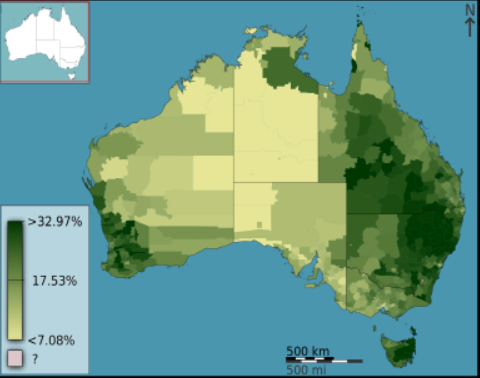

In [0]:
import json

geo_path_seoul = dir + 'seoul-maps-master/kostat/2013/json/seoul_municipalities_geo.json'
geo_json = json.load(open(geo_path_seoul, encoding='utf-8'))

In [0]:
# 행정구역별 맥도날드 매장수 카운트

geo_gu = 

# 인덱싱 재지정
geo_gu = geo_gu.reset_index()
geo_gu.columns = ['구', '매장수']
geo_gu

- [choropleth colorbrewer2](http://colorbrewer2.org/#type=sequential&scheme=GnBu&n=3)

In [0]:
# choropleth

# 사용할 데이터
df_geo = df_mac

# location 정보는 지도의 중심을 어디로 정해줄지 정해줍니다.
map = folium.Map(location=[df_geo['위도'].mean(), df_geo['경도'].mean()],\
                 zoom_start=12)

# choropleth map
map.choropleth(geo_data = geo_json,
               data = geo_gu,
               columns = ['구', '매장수'],
               key_on = 'feature.properties.name',
               fill_color = 'GnBu',               
               fill_opacity=0.7,
               line_opacity=0.7,
               highlight=True)

map

In [0]:
# 맥도날드 매장과 함께 표시해주기
# folium.CircleMaker

# 사용할 데이터
df_geo = df_mac

# 지도를 처음 열어줄 때, 어디를 중심으로 보여줄지 설정합니다.
# 위도와 경도의 평균값을 중심점으로 잡습니다.
# zoom_start는 처음 지도의 크기를 뜻합니다.
map = folium.Map(location=[df_geo['위도'].mean(),df_geo['경도'].mean()],
                           zoom_start=11.5)

# choropleth map
map.choropleth(geo_data = geo_json,
               data = geo_gu,
               columns = ['구', '매장수'],
               key_on = 'feature.properties.name',
               fill_color = 'GnBu',               
               fill_opacity=0.5,
               line_opacity=0.7,
               highlight=True)

# 지도 시각화
for g in df_geo.index:
    
    if (df_geo.loc[g, 'brand'] == 'mac') & (df_geo.loc[g, 'year'] == '2019'):
        icon_color = 'red'
      
    folium.CircleMarker(
        location=[df_geo.loc[g,'위도'], df_geo.loc[g, '경도']],
        radius=2,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

# map.save(./map2.html')
map

**=> 맥도날드 매장 수가 가장 많이 분포해있는 곳은 강남구이며, 용산구와 관악구에 가장 적게 분포해있습니다.**

***
#### **연도별 패스트푸드 매장 분포 비교**


#### **2015년도**

In [0]:
# 2015년도 행정구역별 패스트푸드 매장수

geo_gu_15 = 

# 인덱싱 재지정
geo_gu_15 = geo_gu_15.reset_index()
geo_gu_15.columns = ['구', '매장수']
geo_gu_15

In [0]:
# folium.CircleMaker

# 사용할 데이터
df_geo = df_fastfood

# 지도를 처음 열어줄 때, 어디를 중심으로 보여줄지 설정합니다.
# 위도와 경도의 평균값을 중심점으로 잡습니다.
# zoom_start는 처음 지도의 크기를 뜻합니다.
map = folium.Map(location=[df_geo['위도'].mean(),df_geo['경도'].mean()],
                           zoom_start=12)

# choropleth map
map.choropleth(geo_data = geo_json,
               data = geo_gu_15,
               columns = ['구', '매장수'],
               key_on = 'feature.properties.name',
               fill_color = 'GnBu',               
               fill_opacity=0.5,
               line_opacity=0.7,
               highlight=True)

# 지도 시각화
for g in df_geo.index:
    
    if (df_geo.loc[g, 'brand'] == 'mac') & (df_geo.loc[g, 'year'] == '2015'):
        icon_color = 'red'
                
    elif (df_geo.loc[g, 'brand'] == 'bk') & (df_geo.loc[g, 'year'] == '2015'):
        icon_color = 'blue'
    
    elif (df_geo.loc[g, 'brand'] == 'lott') & (df_geo.loc[g, 'year'] == '2015'):
        icon_color = 'lightgreen'
    
    elif (df_geo.loc[g, 'brand'] == 'moms') & (df_geo.loc[g, 'year'] == '2015'):
        icon_color = 'orange'
        
      
    folium.CircleMarker(
        location=[df_geo.loc[g,'위도'], df_geo.loc[g, '경도']],
        radius=1.2,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

# map.save(./map2.html')
map

**(참고)**
- [pandas multi index](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)
- [DataFrame의 멀티인덱스와 멀티컬럼](https://data-make.tistory.com/126)

In [0]:
# 행정구역별 브랜드 매장 수

df_fastfood_gu_15 = 

df_fastfood_gu_15.columns = ['매장수']

# 멀티인덱스에서 원하는 인덱스를 칼럼으로 지정해주기
df_fastfood_gu_15.reset_index(level=["brand"], inplace=True)
df_fastfood_gu_15

In [0]:
# 행정구역별 패스트푸드 매장수 상위 10개 구

df_gu_top10_15 = 
df_gu_top10_15

In [0]:
df_gu_top10_15.index.unique().values

In [0]:
# barplot
# 다른 브랜드들과 비교 

# plot 사이즈 조절
plt.figure(figsize=(12,8)) # 차트 사이즈
plt.rc('legend', fontsize=15) # 범례 사이즈
plt.rc('axes', labelsize=20) # 축 제목
plt.rc('font', size=20) # x,y 축 값
# plt.xticks(fontsize=20, rotation=0) # x축 값

sns.barplot(data = df_gu_top10_15,
           x = df_gu_top10_15.index,
           y = '매장수',
           hue = 'brand',
           palette="Blues_d"
           )

plt.title("15년도 행정구역별 패스트푸드 매장수", fontsize=30)
plt.show()

**=> 패스트매장 수가 제일 많은 곳은 강남구이며, 상대적으로 버거킹 매장 수가 많음을 확인할 수 있습니다. 반면, 마포구와 용산구 서대문구에서는 롯데리아의 매장 수가 상대적으로 많았습니다.**

#### **2016년도**

In [0]:
# 2016년도 행정구역별 패스트푸드 매장수

geo_gu_16 = pd.DataFrame(df_fastfood[df_fastfood['year']=='2016']['시군구명'].value_counts())
geo_gu_16 = geo_gu_16.reset_index()
geo_gu_16.columns = ['구', '매장수']
geo_gu_16.head(10)

In [0]:
# folium.CircleMaker

# 사용할 데이터
df_geo = df_fastfood

# 지도를 처음 열어줄 때, 어디를 중심으로 보여줄지 설정합니다.
# 위도와 경도의 평균값을 중심점으로 잡습니다.
# zoom_start는 처음 지도의 크기를 뜻합니다.
map = folium.Map(location=[df_geo['위도'].mean(),df_geo['경도'].mean()],
                           zoom_start=12)

# choropleth map
map.choropleth(geo_data = geo_json,
               data = geo_gu_16,
               columns = ['구', '매장수'],
               key_on = 'feature.properties.name',
               fill_color = 'GnBu',               
               fill_opacity=0.5,
               line_opacity=0.7,
               highlight=True)

# 지도 시각화
for g in df_geo.index:
    
    if (df_geo.loc[g, 'brand'] == 'mac') & (df_geo.loc[g, 'year'] == '2016'):
        icon_color = 'red'
                
    elif (df_geo.loc[g, 'brand'] == 'bk') & (df_geo.loc[g, 'year'] == '2016'):
        icon_color = 'blue'
    
    elif (df_geo.loc[g, 'brand'] == 'lott') & (df_geo.loc[g, 'year'] == '2016'):
        icon_color = 'lightgreen'
    
    elif (df_geo.loc[g, 'brand'] == 'moms') & (df_geo.loc[g, 'year'] == '2016'):
        icon_color = 'orange'
        
      
    folium.CircleMarker(
        location=[df_geo.loc[g,'위도'], df_geo.loc[g, '경도']],
        radius=1.2,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

# map.save(./map2.html')
map

In [0]:
# 행정구역별 브랜드 매장 수

df_fastfood_gu_16 = pd.DataFrame(df_fastfood[df_fastfood["year"]=='2016'].groupby(by=['시군구명','brand'])['brand'].count())
df_fastfood_gu_16.columns = ['매장수']
df_fastfood_gu_16.sort_values(by='매장수')
df_fastfood_gu_16.reset_index(level=["brand"], inplace=True)
df_fastfood_gu_16

In [0]:
# 행정구역별 패스트푸드 매장수 상위 10개 구

df_gu_top10_16 = df_fastfood_gu_16.loc[geo_gu_16['구'][:10],:]
df_gu_top10_16

In [0]:
# barplot
# 다른 브랜드들과 비교 

# plot 사이즈 조절
plt.figure(figsize=(12,8)) # 차트 사이즈
plt.rc('legend', fontsize=15) # 범례 사이즈
plt.rc('axes', labelsize=20) # 축 제목
plt.rc('font', size=20) # x,y 축 값
# plt.xticks(fontsize=20, rotation=0) # x축 값

sns.barplot(data = df_gu_top10_16,
           x = df_gu_top10_16.index,
           y = '매장수',
           hue = 'brand',
           palette="Blues_d"
           )

plt.title("16년도 행정구역별 패스트푸드 매장수", fontsize=30)
plt.show()

**=> 강남구의 매장 수가 제일 많고, 상대적으로 버거킹 매장수가 많은 것을 볼 수 있습니다. 용산구에서는 롯데리아 매장이 많지만 맥도날드 매장도 조금 증가한 것을 볼 수 있습니다. 전반적인 지역에서 맥도날드와 맘스터치 매장 수도 늘어났습니다.**

***
#### **15년도 대비 16년도의 행정구역별 패스트푸드 매장 수 증감 계산**

**(참고)**
- [python df sub](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sub.html)

In [0]:
# 연도별 매장 수 증감 계산

df_last_y = 
df_this_y = 

# 데이터프레임 간 계산 (-)
df_diff = 

# 시군구명 + brand 인덱스가 맞지 않을 경우 Null값 발생
df_diff_idx = 

# for문
for idx in df_diff_idx:
    
    # df_this_y 에 있는 값일 경우 (+기호)
 
    
    # df_last_y 에 있는 값일 경우 (-기호)

    
    # null값이 있는 인덱스를 찾아 적합한 값을 채워줍니다.


# 인덱스 재설정
df_diff.columns = ['매장수증감']
df_diff.reset_index(level=["brand"], inplace=True)
df_diff

In [0]:
# 16년도에서 매장수가 높았던 구 10개 선정

df_diff_top10_16 = df_diff.loc[geo_gu_16['구'][:10],:]
df_diff_top10_16

In [0]:
# barplot
# 행정구역별 증감

# plot 사이즈 조절
plt.figure(figsize=(12,8)) # 차트 사이즈
plt.rc('legend', fontsize=15) # 범례 사이즈
plt.rc('axes', labelsize=20) # 축 제목
plt.rc('font', size=20) # x,y 축 값
# plt.xticks(fontsize=20, rotation=0) # x축 값

sns.barplot(data = df_diff_top10_16,
           x = df_diff_top10_16.index,
           y = '매장수증감',
           hue = 'brand',
#            color = 'salmon'
           palette="Blues_d"
           )

plt.title("15년도대비 16년도 행정구역별 패스트푸드 매장 증감수", fontsize=30)
plt.show()

**=> 강남, 송파, 서초, 강동, 양천구 등에서 맥도날드 매장 수가 크게 증가했고, 중구에서는 버거킹 매장이 크게 증가했습니다. 반면, 중구에서는 롯데리아 매장이 크게 감소했습니다.**

#### **2017년도**

In [0]:
# 2017년도 행정구역별 패스트푸드 매장수

geo_gu_17 = pd.DataFrame(df_fastfood[df_fastfood['year']=='2017']['시군구명'].value_counts())
geo_gu_17 = geo_gu_17.reset_index()
geo_gu_17.columns = ['구', '매장수']
geo_gu_17.head()

In [0]:
# folium.CircleMaker

# 사용할 데이터
df_geo = df_fastfood

# 지도를 처음 열어줄 때, 어디를 중심으로 보여줄지 설정합니다.
# 위도와 경도의 평균값을 중심점으로 잡습니다.
# zoom_start는 처음 지도의 크기를 뜻합니다.
map = folium.Map(location=[df_geo['위도'].mean(),df_geo['경도'].mean()],
                           zoom_start=12)

# choropleth map
map.choropleth(geo_data = geo_json,
               data = geo_gu_17,
               columns = ['구', '매장수'],
               key_on = 'feature.properties.name',
               fill_color = 'GnBu',               
               fill_opacity=0.5,
               line_opacity=0.7,
               highlight=True)

# 지도 시각화
for g in df_geo.index:
    
    if (df_geo.loc[g, 'brand'] == 'mac') & (df_geo.loc[g, 'year'] == '2017'):
        icon_color = 'red'
                
    elif (df_geo.loc[g, 'brand'] == 'bk') & (df_geo.loc[g, 'year'] == '2017'):
        icon_color = 'blue'
    
    elif (df_geo.loc[g, 'brand'] == 'lott') & (df_geo.loc[g, 'year'] == '2017'):
        icon_color = 'lightgreen'
    
    elif (df_geo.loc[g, 'brand'] == 'moms') & (df_geo.loc[g, 'year'] == '2017'):
        icon_color = 'orange'
        
      
    folium.CircleMarker(
        location=[df_geo.loc[g,'위도'], df_geo.loc[g, '경도']],
        radius=1.2,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

# map.save(./map2.html')
map

In [0]:
# 행정구역별 브랜드 매장 수
df_fastfood_gu_17 = pd.DataFrame(df_fastfood[df_fastfood["year"]=='2017'].groupby(by=['시군구명','brand'])['brand'].count())
df_fastfood_gu_17.columns = ['매장수']
df_fastfood_gu_17.sort_values(by='매장수')
df_fastfood_gu_17.reset_index(level=["brand"], inplace=True)

# 행정구역별 패스트푸드 매장수 상위 10개 구
df_gu_top10_17 = df_fastfood_gu_17.loc[geo_gu_17['구'][:10], :]
df_gu_top10_17

In [0]:
# barplot
# 다른 브랜드들과 비교 

# plot 사이즈 조절
plt.figure(figsize=(12,8)) # 차트 사이즈
plt.rc('legend', fontsize=15) # 범례 사이즈
plt.rc('axes', labelsize=20) # 축 제목
plt.rc('font', size=20) # x,y 축 값
# plt.xticks(fontsize=20, rotation=0) # x축 값

sns.barplot(data = df_gu_top10_17,
           x = df_gu_top10_17.index,
           y = '매장수',
           hue = 'brand',
           palette="Blues_d"
           )

plt.title("17년도 행정구역별 패스트푸드 매장수", fontsize=30)
plt.show()

**=> 17년도에도 역시 강남구가 제일 많은 매장 수를 보이고 있고, 상대적으로 버거킹 매장이 많이 분포해있음을 알 수 있습니다.**

In [0]:
# 연도별 매장 수 증감 계산

df_last_y = pd.DataFrame(df_fastfood[df_fastfood["year"]=='2016'].groupby(by=['시군구명','brand'])['brand'].count())
df_this_y = pd.DataFrame(df_fastfood[df_fastfood["year"]=='2017'].groupby(by=['시군구명','brand'])['brand'].count())

# 데이터프레임 간 계산 (-)
df_diff = df_this_y.sub(df_last_y)

# 시군구명 + brand 인덱스가 맞지 않을 경우 Null값 발생
df_diff_idx = df_diff[df_diff.isnull().any(axis=1)].index

# for문
for idx in df_diff_idx:
    
    # df_this_y 에 있는 값일 경우 (+기호)
    if idx in df_this_y.index:
        value = df_this_y.loc[idx]        
    
    # df_last_y 에 있는 값일 경우 (-기호)
    elif idx in df_last_y.index:
        value = - df_last_y.loc[idx]
    
    # null값이 있는 인덱스를 찾아 적합한 값을 채워줍니다.
    df_diff.loc[idx] = value

# 인덱스 재설정
df_diff.columns = ['매장수증감']
df_diff.reset_index(level=["brand"], inplace=True)

# 행정구역 10개만
df_diff_top10_17 = df_diff.loc[geo_gu_17['구'][:10],:]
df_diff_top10_17

In [0]:
# barplot
# 행정구역별 증감

# plot 사이즈 조절
plt.figure(figsize=(12,8)) # 차트 사이즈
plt.rc('legend', fontsize=15) # 범례 사이즈
plt.rc('axes', labelsize=20) # 축 제목
plt.rc('font', size=20) # x,y 축 값
# plt.xticks(fontsize=20, rotation=0) # x축 값

sns.barplot(data = df_diff_top10_17,
           x = df_diff_top10_17.index,
           y = '매장수증감',
           hue = 'brand',
#            color = 'salmon'
           palette="Blues_d"
           )

plt.title("16년도대비 17년도 행정구역별 패스트푸드 매장 증감수", fontsize=30)
plt.show()

**=> 버거킹의 경우, 강남, 송파, 서초, 영등포와 중구에서 감소했고, 맥도날드의 경우, 강남과 마포에서 많이 감소했습니다. 강남구의 경우, 버거킹, 롯데리아, 맥도날드 매장 모두 감소했지만, 반대로 맘스터치 매장은 증가한 것을 확인할 수 있습니다.**

#### **2018년도**

In [0]:
# 2018년도 행정구역별 패스트푸드 매장수

geo_gu_18 = pd.DataFrame(df_fastfood[df_fastfood['year']=='2018']['시군구명'].value_counts())
geo_gu_18 = geo_gu_18.reset_index()
geo_gu_18.columns = ['구', '매장수']
geo_gu_18.head()

In [0]:
# folium.CircleMaker

# 사용할 데이터
df_geo = df_fastfood

# 지도를 처음 열어줄 때, 어디를 중심으로 보여줄지 설정합니다.
# 위도와 경도의 평균값을 중심점으로 잡습니다.
# zoom_start는 처음 지도의 크기를 뜻합니다.
map = folium.Map(location=[df_geo['위도'].mean(),df_geo['경도'].mean()],
                           zoom_start=12)

# choropleth map
map.choropleth(geo_data = geo_json,
               data = geo_gu_18,
               columns = ['구', '매장수'],
               key_on = 'feature.properties.name',
               fill_color = 'GnBu',               
               fill_opacity=0.5,
               line_opacity=0.7,
               highlight=True)

# 지도 시각화
for g in df_geo.index:
    
    if (df_geo.loc[g, 'brand'] == 'mac') & (df_geo.loc[g, 'year'] == '2018'):
        icon_color = 'red'
                
    elif (df_geo.loc[g, 'brand'] == 'bk') & (df_geo.loc[g, 'year'] == '2018'):
        icon_color = 'blue'
    
    elif (df_geo.loc[g, 'brand'] == 'lott') & (df_geo.loc[g, 'year'] == '2018'):
        icon_color = 'lightgreen'
    
    elif (df_geo.loc[g, 'brand'] == 'moms') & (df_geo.loc[g, 'year'] == '2018'):
        icon_color = 'orange'
        
      
    folium.CircleMarker(
        location=[df_geo.loc[g,'위도'], df_geo.loc[g, '경도']],
        radius=1.2,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

# map.save(./map2.html')
map

In [0]:
# 행정구역별 브랜드 매장 수
df_fastfood_gu_18 = pd.DataFrame(df_fastfood[df_fastfood["year"]=='2018'].groupby(by=['시군구명','brand'])['brand'].count())
df_fastfood_gu_18.columns = ['매장수']
df_fastfood_gu_18.sort_values(by='매장수')
df_fastfood_gu_18.reset_index(level=["brand"], inplace=True)

# 행정구역별 패스트푸드 매장수 상위 10개 구
df_gu_top10_18 = df_fastfood_gu_18.loc[geo_gu_18['구'][:10], :]
df_gu_top10_18

In [0]:
# barplot
# 다른 브랜드들과 비교 

# plot 사이즈 조절
plt.figure(figsize=(12,8)) # 차트 사이즈
plt.rc('legend', fontsize=15) # 범례 사이즈
plt.rc('axes', labelsize=20) # 축 제목
plt.rc('font', size=20) # x,y 축 값
# plt.xticks(fontsize=20, rotation=0) # x축 값

sns.barplot(data = df_gu_top10_18,
           x = df_gu_top10_18.index,
           y = '매장수',
           hue = 'brand',
           palette="Blues_d"
           )

plt.title("18년도 행정구역별 패스트푸드 매장수", fontsize=30)
plt.show()

**=> 17년도에 많이 감소했음에도 불구하고, 18년도에도 역시 강남구가 제일 많은 매장 수를 보이고 있고, 아직까진 상대적으로 버거킹 매장이 많이 분포해있음을 알 수 있습니다.**

In [0]:
# 연도별 매장 수 증감 계산

df_last_y = pd.DataFrame(df_fastfood[df_fastfood["year"]=='2017'].groupby(by=['시군구명','brand'])['brand'].count())
df_this_y = pd.DataFrame(df_fastfood[df_fastfood["year"]=='2018'].groupby(by=['시군구명','brand'])['brand'].count())

# 데이터프레임 간 계산 (-)
df_diff = df_this_y.sub(df_last_y)

# 시군구명 + brand 인덱스가 맞지 않을 경우 Null값 발생
df_diff_idx = df_diff[df_diff.isnull().any(axis=1)].index

# for문
for idx in df_diff_idx:
    
    # df_this_y 에 있는 값일 경우 (+기호)
    if idx in df_this_y.index:
        value = df_this_y.loc[idx]        
    
    # df_last_y 에 있는 값일 경우 (-기호)
    elif idx in df_last_y.index:
        value = - df_last_y.loc[idx]
    
    # null값이 있는 인덱스를 찾아 적합한 값을 채워줍니다.
    df_diff.loc[idx] = value

# 인덱스 재설정
df_diff.columns = ['매장수증감']
df_diff.reset_index(level=["brand"], inplace=True)

# 행정구역 10개만
df_diff_top10_18 = df_diff.loc[geo_gu_18['구'][:10],:]
df_diff_top10_18

In [0]:
# barplot
# 행정구역별 증감

# plot 사이즈 조절
plt.figure(figsize=(12,8)) # 차트 사이즈
plt.rc('legend', fontsize=15) # 범례 사이즈
plt.rc('axes', labelsize=20) # 축 제목
plt.rc('font', size=20) # x,y 축 값
# plt.xticks(fontsize=20, rotation=0) # x축 값

sns.barplot(data = df_diff_top10_18,
           x = df_diff_top10_18.index,
           y = '매장수증감',
           hue = 'brand',
#            color = 'salmon'
           palette="Blues_d"
           )

plt.title("17년도대비 18년도 행정구역별 패스트푸드 매장 증감수", fontsize=30)
plt.show()

**=> 강남구에선 여전히 버거킹과 맥도날드 매장 수가 감소한 반면, 성동구에선 버거킹 매장이 증가했습니다. 송파에서는 롯데리아의 매장 수가 증가했고, 성북구에선 맘스터치 매장이 증가했습니다.**

#### **2019년도**

In [0]:
# 2019년도 행정구역별 패스트푸드 매장수

geo_gu_19 = pd.DataFrame(df_fastfood[df_fastfood['year']=='2019']['시군구명'].value_counts())
geo_gu_19 = geo_gu_19.reset_index()
geo_gu_19.columns = ['구', '매장수']
geo_gu_19.head()

In [0]:
# folium.CircleMaker

# 사용할 데이터
df_geo = df_fastfood

# 지도를 처음 열어줄 때, 어디를 중심으로 보여줄지 설정합니다.
# 위도와 경도의 평균값을 중심점으로 잡습니다.
# zoom_start는 처음 지도의 크기를 뜻합니다.
map = folium.Map(location=[df_geo['위도'].mean(),df_geo['경도'].mean()],
                           zoom_start=12)

# choropleth map
map.choropleth(geo_data = geo_json,
               data = geo_gu_19,
               columns = ['구', '매장수'],
               key_on = 'feature.properties.name',
               fill_color = 'GnBu',               
               fill_opacity=0.5,
               line_opacity=0.7,
               highlight=True)

# 지도 시각화
for g in df_geo.index:
    
    if (df_geo.loc[g, 'brand'] == 'mac') & (df_geo.loc[g, 'year'] == '2019'):
        icon_color = 'red'
                
    elif (df_geo.loc[g, 'brand'] == 'bk') & (df_geo.loc[g, 'year'] == '2019'):
        icon_color = 'blue'
    
    elif (df_geo.loc[g, 'brand'] == 'lott') & (df_geo.loc[g, 'year'] == '2019'):
        icon_color = 'lightgreen'
    
    elif (df_geo.loc[g, 'brand'] == 'moms') & (df_geo.loc[g, 'year'] == '2019'):
        icon_color = 'orange'
        
      
    folium.CircleMarker(
        location=[df_geo.loc[g,'위도'], df_geo.loc[g, '경도']],
        radius=1.2,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

# map.save(./map2.html')
map

In [0]:
# 행정구역별 브랜드 매장 수
df_fastfood_gu_19 = pd.DataFrame(df_fastfood[df_fastfood["year"]=='2019'].groupby(by=['시군구명','brand'])['brand'].count())
df_fastfood_gu_19.columns = ['매장수']
df_fastfood_gu_19.sort_values(by='매장수')
df_fastfood_gu_19.reset_index(level=["brand"], inplace=True)

# 행정구역별 패스트푸드 매장수 상위 10개 구
df_gu_top10_19 = df_fastfood_gu_19.loc[geo_gu_19['구'][:10], :]
df_gu_top10_19

In [0]:
# barplot
# 다른 브랜드들과 비교 

# plot 사이즈 조절
plt.figure(figsize=(12,8)) # 차트 사이즈
plt.rc('legend', fontsize=15) # 범례 사이즈
plt.rc('axes', labelsize=20) # 축 제목
plt.rc('font', size=20) # x,y 축 값
# plt.xticks(fontsize=20, rotation=0) # x축 값

sns.barplot(data = df_gu_top10_19,
           x = df_gu_top10_19.index,
           y = '매장수',
           hue = 'brand',
           palette="Blues_d"
           )

plt.title("19년도 행정구역별 패스트푸드 매장수", fontsize=30)
plt.show()

**=> 19년도에도 여전히 강남구에 햄버거 매장들이 가장 많이 분포해있고, 강남구에선 맥도날드 매장 수가 롯데리아 매장보다 더 많이 분포해있음을 알 수 있습니다.**

In [0]:
# 연도별 매장 수 증감 계산

df_last_y = pd.DataFrame(df_fastfood[df_fastfood["year"]=='2018'].groupby(by=['시군구명','brand'])['brand'].count())
df_this_y = pd.DataFrame(df_fastfood[df_fastfood["year"]=='2019'].groupby(by=['시군구명','brand'])['brand'].count())

# 데이터프레임 간 계산 (-)
df_diff = df_this_y.sub(df_last_y)

# 시군구명 + brand 인덱스가 맞지 않을 경우 Null값 발생
df_diff_idx = df_diff[df_diff.isnull().any(axis=1)].index

# for문
for idx in df_diff_idx:
    
    # df_this_y 에 있는 값일 경우 (+기호)
    if idx in df_this_y.index:
        value = df_this_y.loc[idx]        
    
    # df_last_y 에 있는 값일 경우 (-기호)
    elif idx in df_last_y.index:
        value = - df_last_y.loc[idx]
    
    # null값이 있는 인덱스를 찾아 적합한 값을 채워줍니다.
    df_diff.loc[idx] = value

# 인덱스 재설정
df_diff.columns = ['매장수증감']
df_diff.reset_index(level=["brand"], inplace=True)

# 행정구역 10개만
df_diff_top10_19 = df_diff.loc[geo_gu_19['구'][:10],:]
df_diff_top10_19

In [0]:
# barplot
# 행정구역별 증감

# plot 사이즈 조절
plt.figure(figsize=(12,8)) # 차트 사이즈
plt.rc('legend', fontsize=15) # 범례 사이즈
plt.rc('axes', labelsize=20) # 축 제목
plt.rc('font', size=20) # x,y 축 값
# plt.xticks(fontsize=20, rotation=0) # x축 값

sns.barplot(data = df_diff_top10_19,
           x = df_diff_top10_19.index,
           y = '매장수증감',
           hue = 'brand',
#            color = 'salmon'
           palette="Blues_d"
           )

plt.title("18년도대비 19년도 행정구역별 패스트푸드 매장 증감수", fontsize=30)
plt.show()

**=> 19년도는 작년 대비 감소한 브랜드가 없으며, 버거킹의 경우, 강남, 강서, 서초 등에서 다시 증가했음을 확인할 수 있습니다. 맥도날드 매장 역시 강남과 강서, 동대문구에서 증가했으며, 10개의 행정구역에선 맘스터치는 증가한 구는 없음을 확인할 수 있습니다.**

**=> 질문 3. "패스트푸드 매장은 어느 지역에 많이 분포할까?"에 대한 답은 15년도부터 19년 5년동안 서울에서는 강남구에 가장 많이 분포해 있으며, 4개의 브랜드 중 강남구에는 버거킹 매장이 가장 많이 분포해있습니다.**

In [0]:
# 연도별 매장수 상위 10개의 행정구역의 변화를 표로 만들어봅니다.

# 먼저, 빈 데이터프레임을 만들어주고, 원하는 칼럼명을 지정해줍니다.
df_top10 = pd.DataFrame(columns=['2015','2016','2017','2018','2019'])

# 각 칼럼에 맞게 값을 넣어줍니다.
df_top10.loc[:,'2015'] = geo_gu_15['구'][:10].values
df_top10.loc[:,'2016'] = geo_gu_16['구'][:10].values
df_top10.loc[:,'2017'] = geo_gu_17['구'][:10].values
df_top10.loc[:,'2018'] = geo_gu_18['구'][:10].values
df_top10.loc[:,'2019'] = geo_gu_19['구'][:10].values

# 출력해봅니다.
df_top10

In [0]:
# 데이터프레임 저장하기

df_top10.to_csv(dir + 'df_top10.csv')

***
#### **Wrap up**  
- 같이 확인해볼 질문 및 공공데이터셋 소개
- 활용할 라이브러리 로드하고 데이터셋 탐색하기
- 원하는 폴더 내 데이터를 한번에 로드하기 (glob)
- 결측치 확인 및 시각화 (seaborn heatmap/ missingno)
- 결측치 처리 (fillna/ dropna/ dataframe.any())
- 지리정보(위도, 경도)를 이용해 지도 시각화 (matplotlib/ seaborn/ plotnine)
- 데이터셋 정제 및 결합하기
- 데이터 시각화 (barplot/ lineplot)
- folium 을 통해 패스트푸드 매장 분포 확인하기
- Choropleth map 을 통해 행정구역 구분하기
- 연도별 브랜드 매장수 비교하기
- 브랜드별 매장수 증감 확인하기

***
#### **참고할만한 사이트**  
**시각화**
- [Folium Quickstart](https://python-visualization.github.io/folium/quickstart.html#Choropleth-maps)
- [Seaborn을 사용한 데이터 분포 시각화](https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/)
- [주피터 노트북 마크다운](https://hashcode.co.kr/questions/1772/%EB%A7%88%ED%81%AC%EB%8B%A4%EC%9A%B4-%EB%AC%B8%EB%B2%95-%EC%9E%91%EC%84%B1-%ED%8C%81)
- [Python Graph Gallery](https://python-graph-gallery.com/)

**데이터소스**
- [공공데이터포털](https://www.data.go.kr/)
- [서울열린데이터광장](https://data.seoul.go.kr/)
- [빅데이터캠퍼스](https://bigdata.seoul.go.kr/main.do)
- [KB경영연구소](https://www.kbfg.com/kbresearch/report/reportView.do?reportId=1003860)